In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HousingData.csv')

In [33]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [34]:
# rename MEDV to price

df.rename(columns={'MEDV':'price'}, inplace=True)
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90    NaN   36.2  


In [36]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [39]:
# prompt: drop null rows

df = df.dropna()


In [42]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [45]:
# into traget and feature
X = df.drop(['price'], axis=1)
Y = df['price']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(X_train.shape, X_test.shape)

(315, 13) (79, 13)


In [48]:
# Model Training
# XG boost regressor
model = XGBRegressor()

In [50]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
# Evaluation
train_predic = model.predict(X_test)
print(train_predic)

[21.005878  22.196203  30.5483     6.6124997 15.4265785 21.841581
 26.633707  15.2843895 31.618378  23.768753  28.693087  22.575552
 22.423355  26.993597  23.110023  31.570856  23.302145  21.594858
 24.628725  33.758835  23.060106  20.103207  29.347319  27.393394
 21.442116  45.611546  17.48961   29.543087  19.32598    8.718788
 23.505026  27.129484  20.29957   28.311563  23.720207   7.3592987
 26.47518   26.72953   15.054524  16.92485   20.334011  26.325573
 21.087194  18.550314  27.397383   7.8572335 25.170511  20.249989
 19.793428  29.456615  25.196472  35.04069   21.47769    7.0843263
 21.546322  25.870903  36.254414  18.334003  16.716589  14.807514
 24.653097  16.879595  20.670479  32.46774   23.729809  35.99651
 18.470425  17.007607  22.740442  20.249287  35.536785  15.425072
 18.185442  21.884027  51.860672  28.037697  45.206333  22.605751
 21.250992 ]


In [78]:
acc = model.score(X_test,Y_test)
print(acc)

0.8470798633773929


In [82]:

# R square error
score1 = metrics.r2_score(Y_test, train_predic)


# mean absolute error
score2 = metrics.mean_absolute_error(Y_test, train_predic)

In [83]:
print(score1)
print(score2)

0.8470798633773929
2.254431766799734


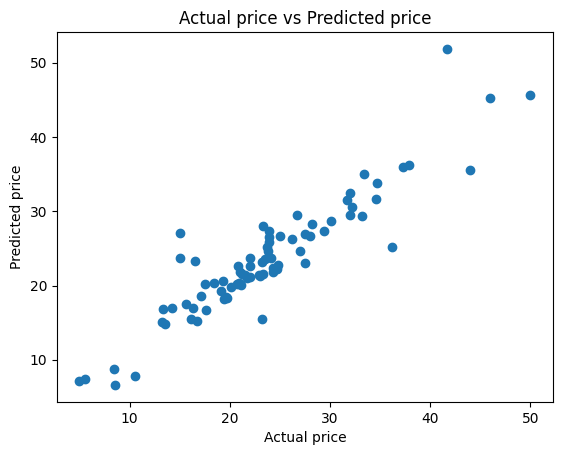

In [84]:
plt.scatter(Y_test, train_predic)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

Visulize the actual prices and predicted values

Test data Evaluation


In [85]:
test_predic  = model.predict(X_test)

In [86]:
#  R squsre error
score_1 = metrics.r2_score(Y_test,  test_predic)
# mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_predic)

In [87]:
print(score_1)
print(score_2)

0.8470798633773929
2.254431766799734


Prediction system


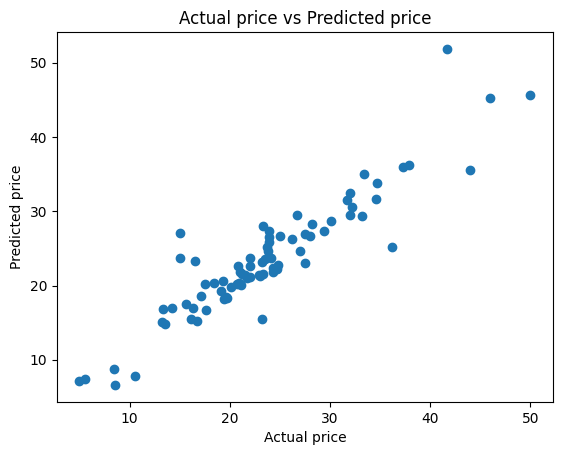

In [88]:
plt.scatter(Y_test, train_predic)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()